In [1]:
# R version 4.1.0 #
# Load packages: Seurat_4.1.1, RColorBrewer_1.1-3, ggplot2_3.3.6, extrafont_0.18, ggpubr_0.4.0

packages = c('Seurat','RColorBrewer','ggplot2','extrafont','ggpubr')
for (p in packages){
    suppressPackageStartupMessages(eval(bquote(library(.(p)))))
}



In [2]:
seurat_file = 'source_data/from_GEO/ds_seurat_PCA_UMAP_clusters_ds38_min10_v4.rds' # download from GEO; also saved in seurat_ds38_min10_v4.R
seurat_archive <- readRDS(seurat_file)


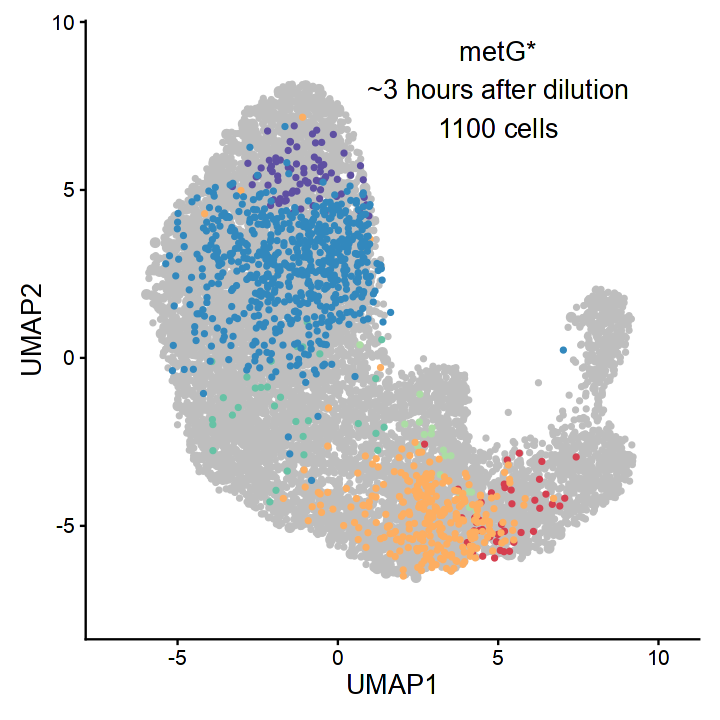

In [3]:
seurat <- seurat_archive
ids = c('metG_pre_20231016')

levels(seurat$seurat_clusters) = c(levels(seurat$seurat_clusters),'10')
seurat@active.ident = seurat$cell.type
sub_seurat=subset(seurat,idents=ids)
seurat$seurat_clusters[!names(seurat$seurat_clusters) %in% names(sub_seurat$seurat_clusters)] = '10'

seurat@active.ident <- seurat$cell.type
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
n_cells_per = 1100
alpha = 1
pt.size = 1
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1

sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
seurat@active.ident <- seurat$seurat_clusters
sampled.cells <- c(sampled.cells,sample(x = names(subset(seurat,idents='10')$cell.type),size=10000,replace=FALSE))

alpha = c(0.1,1,1,1,1,1,1)
DimPlot(subset(seurat,cells=sampled.cells),pt.size=c(rep(2,1100),rep(1,10000)),order=rev(c('0','1','3','4','6','2','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Stationary","Early Lag","Late Lag","Late Exponential","Persister","Early Exponential"),values = alpha(c('gray',my_cols[c(2,7,8,10,4,9)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none',legend.title = element_text(face = "bold")) +
    annotate("text",x=5, y=8, label='metG*\n~3 hours after dilution\n1100 cells', size=16 / .pt, family="Arial")
ggsave('figures/fig2a_metG_3hr_umap.pdf',width = 6, height = 6)


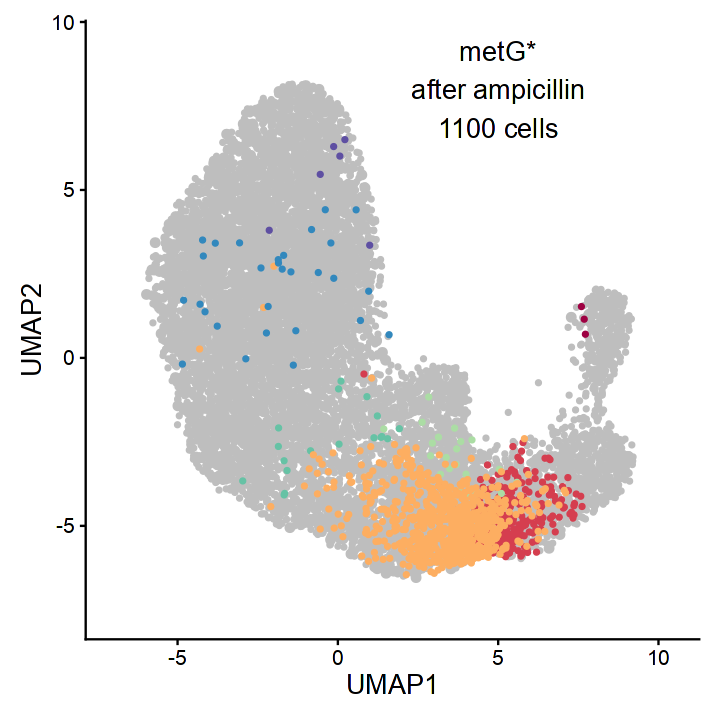

In [4]:
seurat <- seurat_archive
ids = c('metG_amp_20231016')

levels(seurat$seurat_clusters) = c(levels(seurat$seurat_clusters),'10')
seurat@active.ident = seurat$cell.type
sub_seurat=subset(seurat,idents=ids)
seurat$seurat_clusters[!names(seurat$seurat_clusters) %in% names(sub_seurat$seurat_clusters)] = '10'

seurat@active.ident <- seurat$cell.type
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
n_cells_per = 1100
alpha = 1
pt.size = 1
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1

sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
seurat@active.ident <- seurat$seurat_clusters
sampled.cells <- c(sampled.cells,sample(x = names(subset(seurat,idents='10')$cell.type),size=10000,replace=FALSE))

alpha = c(0.1,1,1,1,1,1,1,1)
DimPlot(subset(seurat,cells=sampled.cells),pt.size=c(rep(2,1100),rep(1,10000)),order=rev(c('0','1','3','4','6','2','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Early Stationary","Stationary","Early Lag","Late Lag","Late Exponential","Persister","Early Exponential"),values = alpha(c('gray',my_cols[c(1,2,7,8,10,4,9)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none',legend.title = element_text(face = "bold")) +
    annotate("text",x=5, y=8, label='metG*\nafter ampicillin\n1100 cells', size=16 / .pt, family="Arial")
ggsave('figures/fig2a_metG_amp_umap.pdf',width = 6, height = 6)


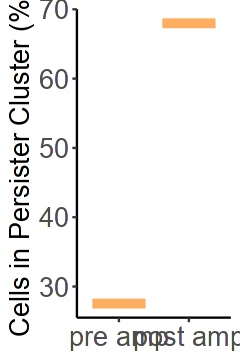

In [5]:
seurat <- seurat_archive
seurat@active.ident <- seurat$cell.type

ids = c('metG_pre_20231016')
pre_list = c()
for (ident in ids){
  prop = prop.table(as.integer(table(subset(seurat,idents=ident)$seurat_clusters)))[3]
  pre_list = c(pre_list,prop)
}

ids = c('metG_amp_20231016')
post_list = c()
for (ident in ids){
  prop = prop.table(as.integer(table(subset(seurat,idents=ident)$seurat_clusters)))[3]
  post_list = c(post_list,prop)
}

fraction = c(pre_list,post_list)
l = c("pre amp","post amp") 
type = rep(l, c(length(pre_list),length(post_list)))
DATASET <- data.frame(fraction,type,stringsAsFactors = TRUE)


options(repr.plot.width=2, repr.plot.height=3)
set.seed(1)
DATASET$type <- factor(DATASET$type,levels=l)

ggplot(DATASET, aes(type, 100*fraction)) +
    geom_boxplot(colour = my_cols[4],lwd=2,fatten=1) +
    theme_classic()  +
    theme(
        axis.title.x = element_blank(),
        text=element_text(family= "Arial", size=16),
        axis.text.y = element_text(family= "Arial", size=16),
        axis.text.x = element_text(family= "Arial", size=16),
        axis.title.y = element_text(family= "Arial", size=16),
        legend.position='none') + ylab('Cells in Persister Cluster (%)')
ggsave('figures/fig2a_metG_boxplot.pdf',width = 8, height = 6)


[1] "h1_42min_20211217" "h2_42min_20211217" "h3_50min_20211217"


[1] 0.0002734931 0.0003281917 0.0533311454 0.0015862597 0.0624111148
[6] 0.7918717865 0.0901980090 0.0000000000

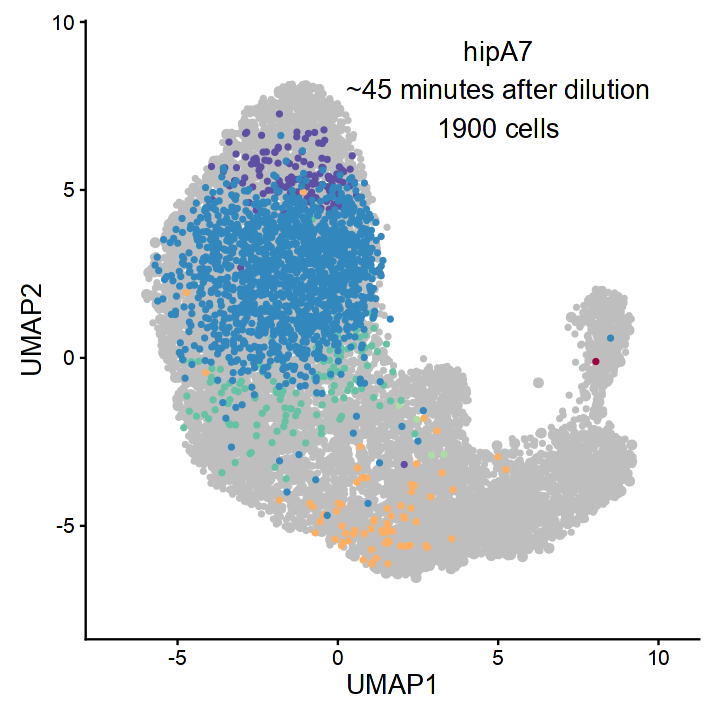

In [6]:
seurat <- seurat_archive

ids = levels(seurat$cell.type)[(grepl('h1|h2|h3',levels(seurat$cell.type)))&(grepl('42min|50min',levels(seurat$cell.type)))]
print(ids)

levels(seurat$seurat_clusters) = c(levels(seurat$seurat_clusters),'10')
seurat@active.ident = seurat$cell.type
sub_seurat=subset(seurat,idents=ids)
prop.table(as.integer(table(sub_seurat$seurat_clusters)))

seurat$seurat_clusters[!names(seurat$seurat_clusters) %in% names(sub_seurat$seurat_clusters)] = '10'

seurat@active.ident <- seurat$cell.type
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
n_cells_per = 1900/3
alpha = 1
pt.size = 2
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1

sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
seurat@active.ident <- seurat$seurat_clusters
sampled.cells <- c(sampled.cells,sample(x = names(subset(seurat,idents='10')$cell.type),size=10000,replace=FALSE))

alpha = c(0.1,1,1,1,1,1,1)
DimPlot(subset(seurat,cells=sampled.cells),pt.size=c(rep(2,1899),rep(1,10000)),order=rev(c('0','1','3','4','6','2','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Early Stationary","Early Lag","Late Lag","Late Exponential","Persister","Early Exponential"),values = alpha(c('gray',my_cols[c(1,7,8,10,4,9)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none') + 
    annotate("text",x=5, y=8, label='hipA7\n~45 minutes after dilution\n1900 cells', size=16 / .pt, family="Arial")
ggsave('figures/fig2d_hipA7_45min_umap.pdf',width = 6, height = 6)


[1] "WT_42min_20211217"


[1] 0.000000000 0.000000000 0.006051437 0.001512859 0.062027231 0.859808371
[7] 0.070600101 0.000000000

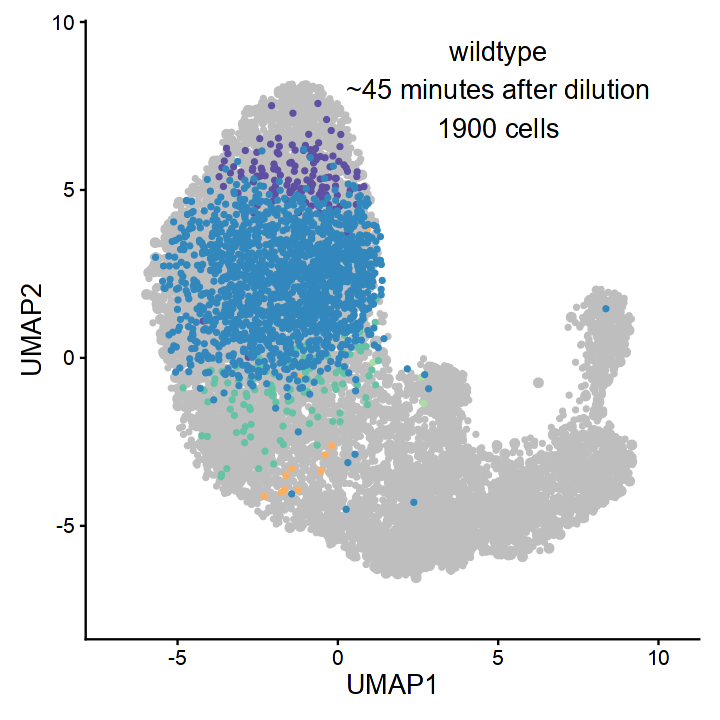

In [7]:
seurat <- seurat_archive

ids = levels(seurat$cell.type)[(grepl('WT_42min_20211217',levels(seurat$cell.type)))]
print(ids)

levels(seurat$seurat_clusters) = c(levels(seurat$seurat_clusters),'10')
seurat@active.ident <- seurat$cell.type
sub_seurat=subset(seurat,idents=ids)
prop.table(as.integer(table(sub_seurat$seurat_clusters)))

seurat$seurat_clusters[!names(seurat$seurat_clusters) %in% names(sub_seurat$seurat_clusters)] = '10'

seurat@active.ident <- seurat$cell.type
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
n_cells_per = 1900
alpha = 1
pt.size = 1
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1
sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
seurat@active.ident <- seurat$seurat_clusters
sampled.cells <- c(sampled.cells,sample(x = names(subset(seurat,idents='10')$cell.type),size=10000,replace=FALSE))

alpha = c(0.1,1,1,1,1,1)
DimPlot(subset(seurat,cells=sampled.cells),pt.size=c(rep(2,1900),rep(1,10000)),order=rev(c('1','3','4','6','2','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Early Lag","Late Lag","Late Exponential","Persister","Early Exponential"),values = alpha(c('gray',my_cols[c(7,8,10,4,9)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none') + 
    annotate("text",x=5, y=8, label='wildtype\n~45 minutes after dilution\n1900 cells', size=16 / .pt, family="Arial")
ggsave('figures/fig2e_WT_45min_umap.pdf',width = 6, height = 6)


Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '∗' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '∗' in 'mbcsToSbcs': dot substituted for <88>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '∗' in 'mbcsToSbcs': dot substituted for <97>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '∗' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '∗' in 'mbcsToSbcs': dot substituted for <88>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '∗' in 'mbcsToSbcs': dot substituted for <97>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label

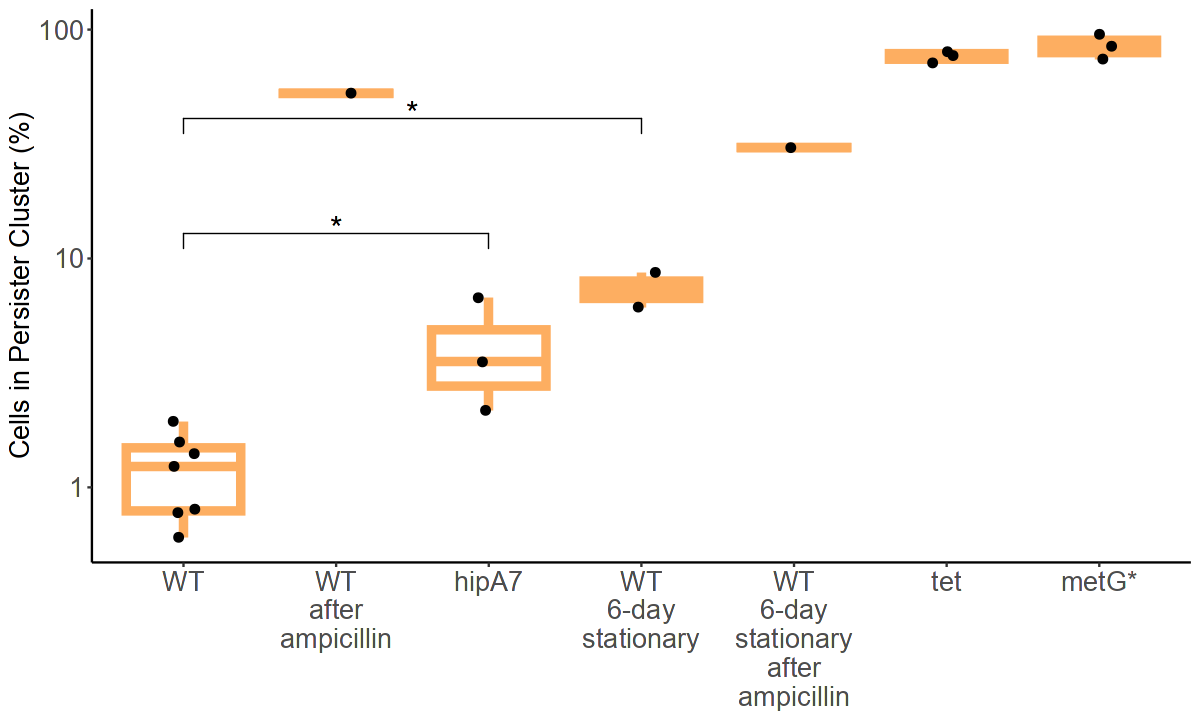

In [8]:
seurat <- seurat_archive
seurat@active.ident <- seurat$cell.type

ids = c('t4_1hr_WT_20210722','WT_1hr_20220331','WT_42min_20211217','d1_1hr_1_20220807','WT_1hr_20220527','tet2_20211014','wt_1hr_20231016')
wt_list = c()
for (ident in ids){
  prop = prop.table(as.integer(table(subset(seurat,idents=ident)$seurat_clusters)))[3]
  wt_list = c(wt_list,prop)
}

ids = levels(seurat$cell.type)[(grepl('h1|h2|h3',levels(seurat$cell.type)))&(grepl('42min|50min',levels(seurat$cell.type)))]
hip_list = c()
for (ident in ids){
  prop = prop.table(as.integer(table(subset(seurat,idents=ident)$seurat_clusters)))[3]
  hip_list = c(hip_list,prop)
}

ids = c('d6_1hr_1_20220422','d6_1hr_2_20220422') 
d6_list = c()
for (ident in ids){
  prop = prop.table(as.integer(table(subset(seurat,idents=ident)$seurat_clusters)))[3]
  d6_list = c(d6_list,prop)
}

ids = c('d6_amp_3_20220422')
#print(ids)
d6_amp_list = c()
for (ident in ids){
  prop = prop.table(as.integer(table(subset(seurat,idents=ident)$seurat_clusters)))[3]
  d6_amp_list = c(d6_amp_list,prop)
}

ids = c('wt_amp_20231016')
wt_amp_list = c()
for (ident in ids){
  prop = prop.table(as.integer(table(subset(seurat,idents=ident)$seurat_clusters)))[3]
  wt_amp_list = c(wt_amp_list,prop)
}

ids = c('tet1_20211014','tet5_20211014','tet1hr_20230919')
tet_list = c()
for (ident in ids){
  prop = prop.table(as.integer(table(subset(seurat,idents=ident)$seurat_clusters)))[3]
  tet_list = c(tet_list,prop)
}

ids = c('metG1_20200926','metG5_20201018_1','metG_52min_20211217')
metG_list = c()
for (ident in ids){
  prop = prop.table(as.integer(table(subset(seurat,idents=ident)$seurat_clusters)))[3]
  metG_list = c(metG_list,prop)
}


fraction = c(wt_list, wt_amp_list,hip_list,d6_list,d6_amp_list,tet_list,metG_list)
l = c("WT","WT\nafter\nampicillin","hipA7","WT\n6-day\nstationary","WT\n6-day\nstationary\nafter\nampicillin","tet","metG*")
type = rep(l, c(length(wt_list),length(wt_amp_list),length(hip_list),length(d6_list),length(d6_amp_list),length(tet_list),length(metG_list)))
DATASET <- data.frame(fraction,type,stringsAsFactors = TRUE)


options(repr.plot.width=10, repr.plot.height=6)
set.seed(1)
DATASET$type <- factor(DATASET$type,levels=l)
my_comparisons <- list( l[c(1,3)],l[c(1,4)] )

ggplot(DATASET, aes(type, 100*fraction)) +
    geom_boxplot(colour = my_cols[4],lwd=2,fatten=1) +
    geom_jitter(colour = 'black',size=2,width=0.1,height=0) + theme_classic()  + scale_y_log10() +
    theme(
        axis.title.x = element_blank(),
        text=element_text(family= "Arial", size=16),
        axis.text.y = element_text(family= "Arial", size=16),
        axis.text.x = element_text(family= "Arial", size=16),
        axis.title.y = element_text(family= "Arial", size=16),
        legend.position='none') + ylab('Cells in Persister Cluster (%)') + 
    stat_compare_means(comparisons = my_comparisons, label='p.signif',
                       symnum.args=list(
                       cutpoints = c(0, 0.0005, 0.005, 0.05, 1), 
                       symbols = c("\u2217\u2217\u2217", "\u2217\u2217", "\u2217", "ns"),
                       family='mono'),
                        label.x = 1.5, label.y = c(1,1.5), size=6,method.args = list(alternative = "less"),method = "wilcox")
ggsave('figures/fig2f_all_boxplot.pdf',width = 8, height = 6)


[1] "wt_amp_20231016"


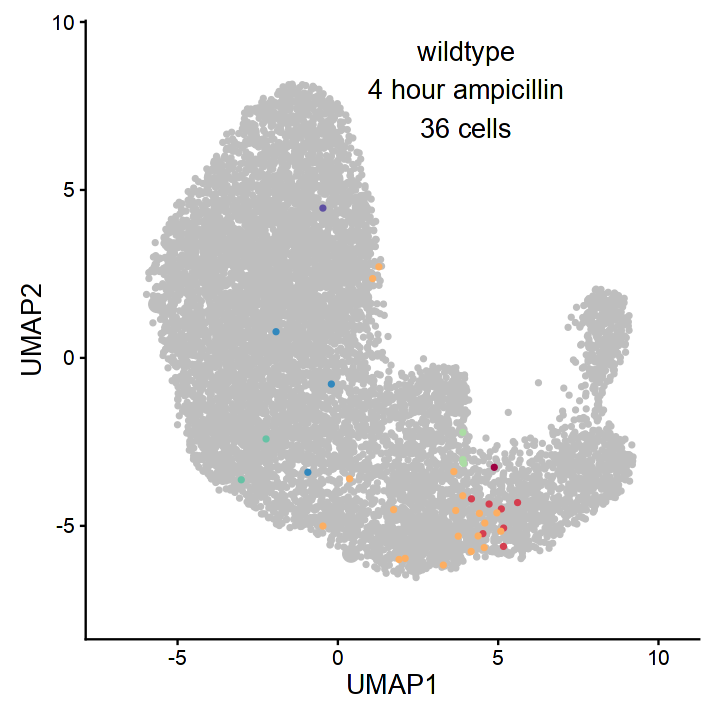

In [9]:
seurat <- seurat_archive
seurat@active.ident <- seurat$cell.type

ids = c('wt_amp_20231016')
print(ids)

levels(seurat$seurat_clusters) = c(levels(seurat$seurat_clusters),'10')
seurat@active.ident <- seurat$cell.type
sub_seurat=subset(seurat,idents=ids)
seurat$seurat_clusters[!names(seurat$seurat_clusters) %in% names(sub_seurat$seurat_clusters)] = '10'

seurat@active.ident <- seurat$cell.type
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
n_cells_per = 36
alpha = 1
pt.size = 4
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1
sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
seurat@active.ident <- seurat$seurat_clusters
sampled.cells <- c(sampled.cells,sample(x = names(subset(seurat,idents='10')$cell.type),size=10000,replace=FALSE))

alpha = c(0.1,1,1,1,1,1,1,1)
DimPlot(subset(seurat,cells=sampled.cells),pt.size=c(rep(4,36),rep(1,10000)),order=rev(c('0','1','3','4','5','6','2'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Early Stationary","Stationary","Early Lag","Late Lag","Early Exponential","Late Exponential","Persister"),values = alpha(c('gray',my_cols[c(1,2,7,8,9,10,4)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none',legend.title = element_text(face = "bold")) +
    annotate("text",x=4, y=8, label='wildtype\n4 hour ampicillin\n36 cells', size=16 / .pt, family="Arial")
ggsave('figures/fig2g_WT_amp_umap.pdf',width = 6, height = 6)


[1] "d6_1hr_1_20220422" "d6_1hr_2_20220422"


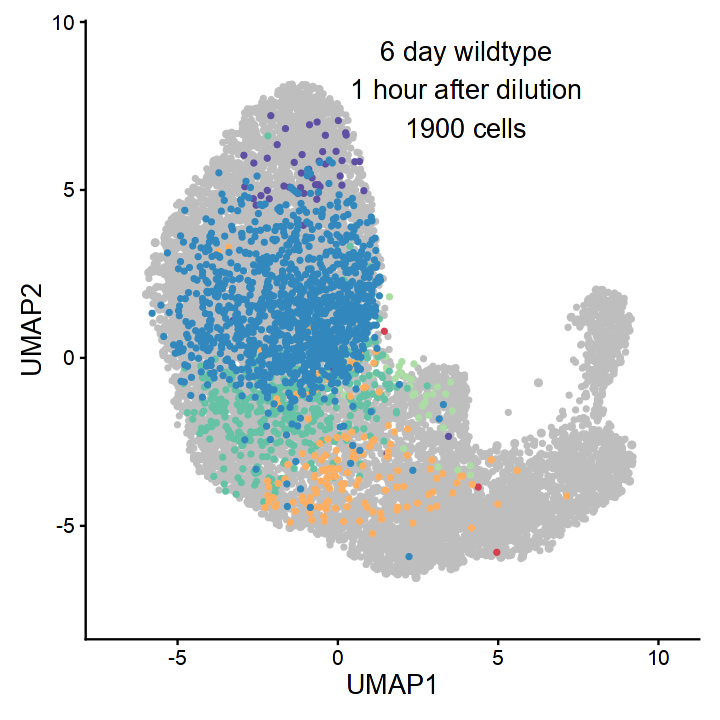

In [10]:
seurat <- seurat_archive

ids = levels(seurat$cell.type)[(grepl('d6_1hr',levels(seurat$cell.type)))]
print(ids)

levels(seurat$seurat_clusters) = c(levels(seurat$seurat_clusters),'10')
seurat@active.ident <- seurat$cell.type
sub_seurat=subset(seurat,idents=ids)
seurat$seurat_clusters[!names(seurat$seurat_clusters) %in% names(sub_seurat$seurat_clusters)] = '10'

seurat@active.ident <- seurat$cell.type
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
n_cells_per = 1900/2
alpha = 1
pt.size = 1
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1
sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
seurat@active.ident <- seurat$seurat_clusters
sampled.cells <- c(sampled.cells,sample(x = names(subset(seurat,idents='10')$cell.type),size=10000,replace=FALSE))
alpha = c(0.1,1,1,1,1,1,1)
DimPlot(subset(seurat,cells=sampled.cells),pt.size=c(rep(1.5,1900),rep(1,10000)),order=rev(c('0','1','3','4','6','2','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Stationary","Early Lag","Late Lag","Late Exponential","Persister","Early Exponential"),values = alpha(c('gray',my_cols[c(2,7,8,10,4,9)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none',legend.title = element_text(face = "bold")) +
    annotate("text",x=4, y=8, label='6 day wildtype\n1 hour after dilution\n1900 cells', size=16 / .pt, family="Arial")
ggsave('figures/fig2h_WT_6d_1hr_umap.pdf',width = 6, height = 6)


[1] "d6_amp_3_20220422"


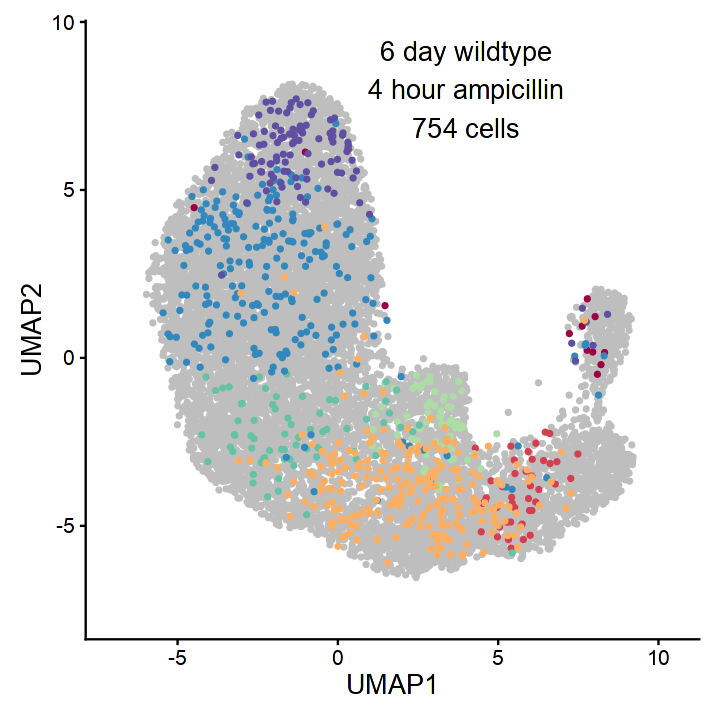

In [11]:
seurat <- seurat_archive
seurat@active.ident <- seurat$cell.type

ids = levels(seurat$cell.type)[(grepl('d6_amp',levels(seurat$cell.type)))]
print(ids)

levels(seurat$seurat_clusters) = c(levels(seurat$seurat_clusters),'10')
seurat@active.ident <- seurat$cell.type
sub_seurat=subset(seurat,idents=ids)
seurat$seurat_clusters[!names(seurat$seurat_clusters) %in% names(sub_seurat$seurat_clusters)] = '10'


seurat@active.ident <- seurat$cell.type
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
n_cells_per = 754
alpha = 1
pt.size = 1
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1
sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- c(sampled.cells,sample(x = names(subset(sub_seurat,idents=id)$cell.type), size = n_cells_per, replace = F))
}
seurat@active.ident <- seurat$seurat_clusters
sampled.cells <- c(sampled.cells,sample(x = names(subset(seurat,idents='10')$cell.type),size=10000,replace=FALSE))

alpha = c(0.1,1,1,1,1,1,1,1)
DimPlot(subset(seurat,cells=sampled.cells),pt.size=c(rep(1.5,754),rep(1,10000)),order=rev(c('0','1','3','4','5','6','2'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Early Stationary","Stationary","Early Lag","Late Lag","Early Exponential","Late Exponential","Persister"),values = alpha(c('gray',my_cols[c(1,2,7,8,9,10,4)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none',legend.title = element_text(face = "bold")) +
    annotate("text",x=4, y=8, label='6 day wildtype\n4 hour ampicillin\n754 cells', size=16 / .pt, family="Arial")
ggsave('figures/fig2i_WT_6d_amp_umap.pdf',width = 6, height = 6)


[1] "tet1_20211014"   "tet5_20211014"   "tet1hr_20230919"


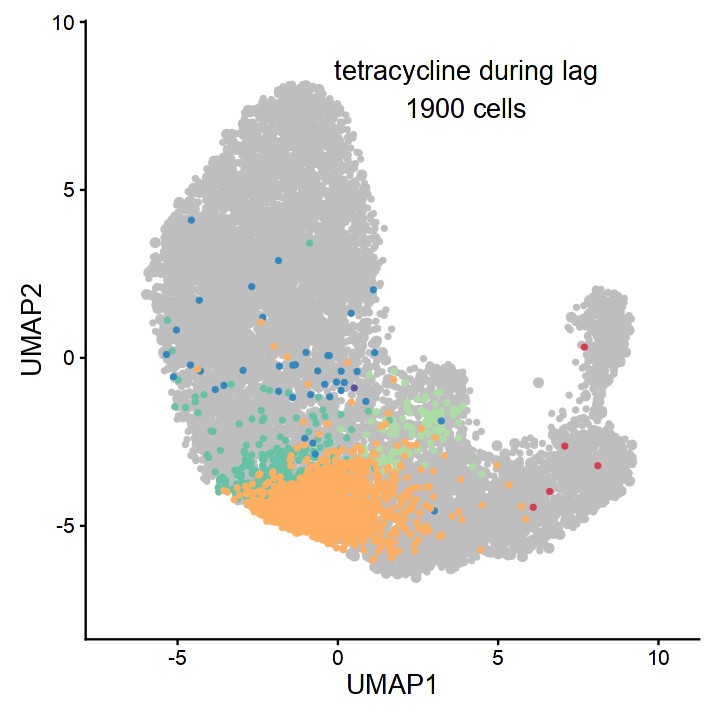

In [12]:
seurat <- seurat_archive

ids = c('tet1_20211014','tet5_20211014','tet1hr_20230919')
print(ids)
levels(seurat$seurat_clusters) = c(levels(seurat$seurat_clusters),'10')
seurat@active.ident <- seurat$cell.type
sub_seurat=subset(seurat,idents=ids)
seurat$seurat_clusters[!names(seurat$seurat_clusters) %in% names(sub_seurat$seurat_clusters)] = '10'

seurat@active.ident <- seurat$cell.type
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
n_cells = 1900
alpha = 1
pt.size = 1
xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1
sub_seurat$cell.type <- droplevels(sub_seurat$cell.type)
sampled.cells <- c()
set.seed(111)
for(id in levels(sub_seurat$cell.type)){
    sampled.cells <- sample(x = names(sub_seurat$cell.type), size = n_cells, replace = F)
}
seurat@active.ident <- seurat$seurat_clusters
sampled.cells <- c(sampled.cells,sample(x = names(subset(seurat,idents='10')$cell.type),size=10000,replace=FALSE))

alpha = c(0.1,1,1,1,1,1,1)
DimPlot(subset(seurat,cells=sampled.cells),pt.size=c(rep(2,1900),rep(1,10000)),order=rev(c('0','1','3','4','5','6','2'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Stationary","Early Lag","Late Lag","Early Exponential","Late Exponential","Persister"),values = alpha(c('gray',my_cols[c(2,7,8,9,10,4)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none',legend.title = element_text(face = "bold")) +
    annotate("text",x=4, y=8, label='tetracycline during lag\n1900 cells', size=16 / .pt, family="Arial")
ggsave('figures/fig2j_tet_lag_umap.pdf',width = 6, height = 6)
